# Introduction

In [18]:
# !pip install yfinance numpy scipy matplotlib scienceplots --quiet
# !apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super --quiet


# # For latex text in the graphs
# import matplotlib.pyplot as plt
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
#     "text.latex.preamble": r"\usepackage{amsmath}"
# })

Reading package lists...
Building dependency tree...
Reading state information...
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


# Loading Data

In [19]:
import yfinance as yf
df = yf.download('AAPL', auto_adjust = True)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098597,0.099025,0.098597,0.098597,469033600
1980-12-15,0.093453,0.093881,0.093453,0.093881,175884800
1980-12-16,0.086594,0.087022,0.086594,0.087022,105728000
1980-12-17,0.088737,0.089165,0.088737,0.088737,86441600
1980-12-18,0.091309,0.091738,0.091309,0.091309,73449600


In [20]:
df = yf.download('JPY=X', start = '2018-01-01', auto_adjust = True)
df.columns = ['Close',	'High',	'Low',	'Open',	'Volume']
df = df.iloc[:,0:4]
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open
Date,,,,
2018-01-01,112.666000,112.690002,112.669998,112.680000
2018-01-02,112.769997,112.788002,112.074997,112.769997
2018-01-03,112.244003,112.485001,112.193001,112.264000
2018-01-04,112.607002,112.853996,112.507004,112.606003
2018-01-05,112.782997,113.289001,112.731003,112.790001


# Trading Strategies
- Mean reversion
- Geometric Brownian Motion
- GARCH(1,1) model
- Macro-economic Models using
  - Leading indicators
    - Interest Rate Expectations,
    - Purchasing Managers’ Index (PMI)
    - Consumer Confidence Index (CCI)
    - Retail Sales
    - Building Permits & Housing Starts
    - Yield Curve (e.g., 10Y-2Y Spread)
    - Stock Market Performance
    - Money Supply (M2)
    - Jobless Claims / Employment Trends
    - Business Confidence Surveys
  - Conincide indicators
    - Gross Domestic Product (GDP)
    - Industrial Production
    - Non-Farm Payrolls (NFP) – U.S
    - Personal Income and Spending
    - Retail Sales
    - Capacity Utilization Rate
    - Employment Levels
  - Lagging indicators
    - Average Duration of Unemployment
    - Consumer Price Index (CPI)
    - Labor Cost per Unit of Output
    - Commercial and Industrial Loans Outstanding
    - Ratio of Manufacturing and Trade Inventories to Sales
    - Prime Interest Rate
    - Outstanding Consumer Credit

In [30]:
pd.DataFrame(df.iloc[:,0])

,Close
Date,
2018-01-01,112.666000
2018-01-02,112.769997
2018-01-03,112.244003
2018-01-04,112.607002
2018-01-05,112.782997
...,...
2025-07-21,148.431000
2025-07-22,147.408997
2025-07-23,146.785004


<Figure size 1200x800 with 0 Axes>

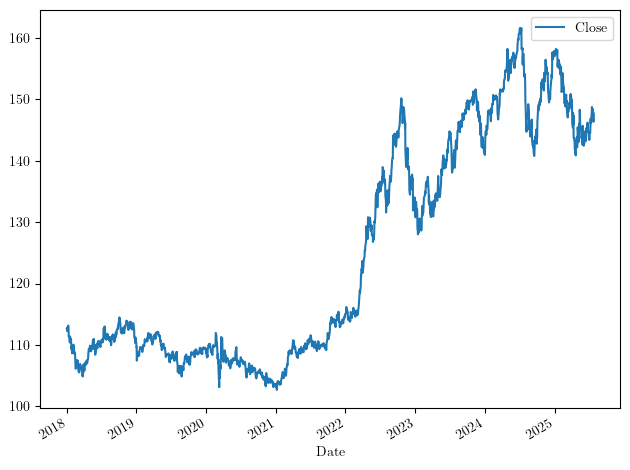

In [31]:
df_usdjpy = pd.DataFrame(df.iloc[:,0])

# plotting the data 
plt.figure(figsize = (12,8))
import scienceplots
df_usdjpy.plot()
plt.grid(False)
plt.tight_layout()
plt.show()

# 1. Mean Reversion Strategy

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculating rolling stats
df_usdjpy['LogReturn'] = np.log(df_usdjpy['Close'].div(df_usdjpy['Close'].shift(1)))
df_usdjpy['RollingMean'] = df_usdjpy['Close'].rolling(window = 20).mean()
df_usdjpy['RollingStd'] = df_usdjpy['Close'].rolling(window = 20).std()
df_usdjpy['ZScore'] = df_usdjpy['Close'] - df_usdjpy['Close']/df_usdjpy['RollingStd']
df_usdjpy.dropna(inplace = True)
df_usdjpy.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,LogReturn,RollingMean,RollingStd,ZScore,LongSignal,ShortSignal,ExitSignal,StrtegyReturns,CumulativeReturns
Date,,,,,,,,,,
2018-04-25,108.803001,0.000386,107.115800,0.730730,-40.093324,False,False,True,0.0,0.0
2018-04-26,109.363998,0.005143,107.243400,0.882038,-14.626156,False,False,True,0.0,0.0
2018-04-27,109.300003,-0.000585,107.384451,0.974118,-2.904041,False,False,True,-0.0,0.0
2018-04-30,109.098000,-0.001850,107.523751,1.011180,1.206249,False,False,True,-0.0,0.0
2018-05-01,109.322998,0.002060,107.699950,1.001810,0.197492,False,False,False,0.0,0.0


In [65]:
# Creating Signals
# df_usdjpy['LongSignal'] = np.where(df_usdjpy['ZScore'] < -1, 1, 0)
# df_usdjpy['ShortSignal'] = np.where(df_usdjpy['ZScore'] > 1, -1, 0)
# df_usdjpy['ExitSignal'] = np.where((df_usdjpy['ZScore'] > - 0.5) & (df_usdjpy['ZScore'] < 0.5), 0.5, 0)

# df_usdjpy.head()

In [64]:
# Creating Signals
df_usdjpy['LongSignal'] = df_usdjpy['ZScore'] < -1
df_usdjpy['ShortSignal'] = df_usdjpy['ZScore'] > 1
df_usdjpy['ExitSignal'] = (df_usdjpy['ZScore'] > - 0.5) & (df_usdjpy['ZScore'] < 0.5)

df_usdjpy.head()

/tmp/ipykernel_36/1982253005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usdjpy['LongSignal'] = df_usdjpy['ZScore'] < -1
/tmp/ipykernel_36/1982253005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usdjpy['ShortSignal'] = df_usdjpy['ZScore'] > 1
/tmp/ipykernel_36/1982253005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Close,LogReturn,RollingMean,RollingStd,ZScore,LongSignal,ShortSignal,ExitSignal,StrtegyReturns,CumulativeReturns
Date,,,,,,,,,,
2018-04-26,109.363998,0.005143,107.243400,0.882038,-14.626156,True,False,False,0.560997,0.560997
2018-04-27,109.300003,-0.000585,107.384451,0.974118,-2.904041,True,False,False,-0.063995,0.497002
2018-04-30,109.098000,-0.001850,107.523751,1.011180,1.206249,False,True,False,0.202003,0.699005
2018-05-01,109.322998,0.002060,107.699950,1.001810,0.197492,False,False,True,0.000000,0.699005
2018-05-02,109.872002,0.005009,107.871751,1.066197,6.821651,False,True,False,-0.549004,0.150002


In [60]:
np.where(df_usdjpy['ZScore'] < -1, 1, 0)

array([1, 1, 0, ..., 0, 0, 0])

In [52]:
# Simulate the strategy
postion = 0
returns = []
for i in range(1, len(df_usdjpy)):
    if df_usdjpy['LongSignal'].iloc[i]:
        position = 1

    elif df_usdjpy['ShortSignal'].iloc[i]:
        position = -1

    elif df_usdjpy['ExitSignal'].iloc[i]:
        position = 0

    daily_returns = position * (df_usdjpy['Close'].iloc[i] - df_usdjpy['Close'].iloc[i-1])
    returns.append(daily_returns)

# Add returns to the dataframe 
df_usdjpy = df_usdjpy.iloc[1:]
df_usdjpy['StrtegyReturns'] = returns
df_usdjpy['CumulativeReturns'] = np.cumsum(df_usdjpy['StrtegyReturns'])

df_usdjpy.head()

/tmp/ipykernel_36/2408995171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usdjpy['StrtegyReturns'] = returns
/tmp/ipykernel_36/2408995171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usdjpy['CumulativeReturns'] = np.cumsum(df_usdjpy['StrtegyReturns'])


,Close,LogReturn,RollingMean,RollingStd,ZScore,LongSignal,ShortSignal,ExitSignal,StrtegyReturns,CumulativeReturns
Date,,,,,,,,,,
2018-04-26,109.363998,0.005143,107.243400,0.882038,-14.626156,True,False,False,0.560997,0.560997
2018-04-27,109.300003,-0.000585,107.384451,0.974118,-2.904041,True,False,False,-0.063995,0.497002
2018-04-30,109.098000,-0.001850,107.523751,1.011180,1.206249,False,True,False,0.202003,0.699005
2018-05-01,109.322998,0.002060,107.699950,1.001810,0.197492,False,False,True,0.000000,0.699005
2018-05-02,109.872002,0.005009,107.871751,1.066197,6.821651,False,True,False,-0.549004,0.150002


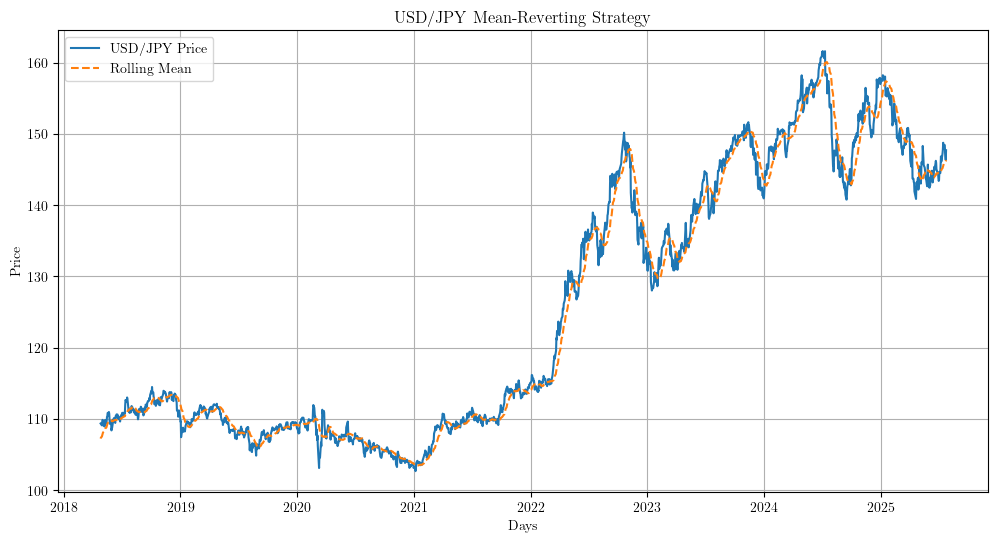

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df_usdjpy['Close'], label='USD/JPY Price')
plt.plot(df_usdjpy['RollingMean'], label='Rolling Mean', linestyle='--')
plt.title('USD/JPY Mean-Reverting Strategy')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

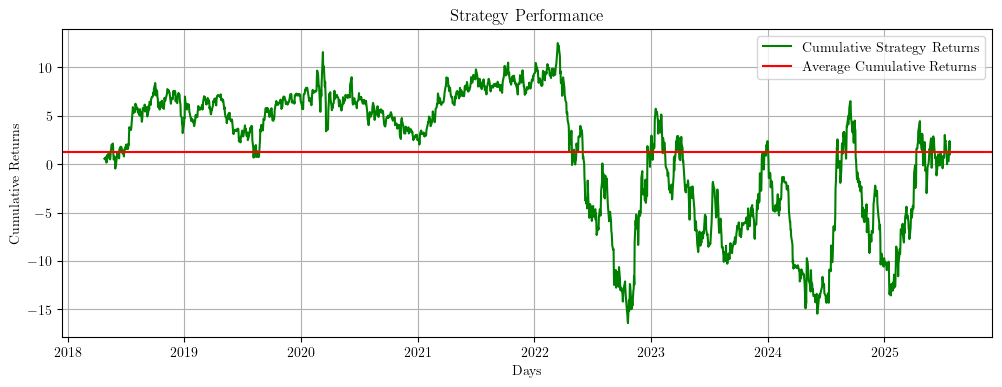

In [59]:

plt.figure(figsize=(12, 4))
plt.plot(df_usdjpy['CumulativeReturns'], label='Cumulative Strategy Returns', color='green')
plt.axhline(df_usdjpy['CumulativeReturns'].mean(), label = 'Average Cumulative Returns', color = 'red')
plt.title('Strategy Performance')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
